<a href="https://colab.research.google.com/github/stymgupta/Exploratory-Data-Analysis---Sports/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 5: Exploratory Data Analysis - Sports**

**Problem: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

Dataset: https://bit.ly/34SRn3b

***Author: Vaibhav Kumar***

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading the Datasets**

In [2]:
match = pd.read_csv("/content/drive/MyDrive/IPL/matches.csv")
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
delivery = pd.read_csv("/content/drive/MyDrive/IPL/deliveries.csv")
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#Number of Rows and Columns in Datasets
print("Shape of Matches Data:-", match.shape)
print("Shape of Deliveries Data:-", delivery.shape)

Shape of Matches Data:- (756, 18)
Shape of Deliveries Data:- (179078, 21)


In [5]:
#information about the columns of both datasets
match.info()
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Description of Both Datasets**

In [6]:
#For Matches data description
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
#For Deliveries data description
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


**For checking Null Values in both datasets**

In [8]:
#null values for matches data
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**"There are missing values present in dataset matches:- city(7), winner(4), player_of_matches(4), umpire1(2), umpire2(2) and umpire3(637)"**

In [9]:
#null values for deliveries dataset
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**"There are missing values present in dataset deliveries:- player_dismissed(170244), dismissal_kind(170244) and fielder(172630)"**

**Dealing with missing values of both the Datasets**

In [11]:
#Deal with Matches datasets
match[match.city.isnull()][['city', 'venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [12]:
match.city = match.city.fillna('Dubai')

In [13]:
match = match.drop('umpire3', axis = 1)

There are **33** distinct values of **city** but we have **35 venues**. Check, which cities have **multiple venues.**

In [14]:
venue = match.groupby(['city','venue']).count()['season']
venue_df = pd.DataFrame(venue)
venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

**NOTE**

**Bengaluru** and **Bangalore** both are same but both name exist in data, so discarding one of them.

**Pune** has 2 different stadiums used for IPL whereas **Mumbai** has 3.

**Merging the datasets**

In [16]:
merge = pd.merge(delivery, match, left_on='match_id', right_on='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [17]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [18]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


**Number of matches played in each season**

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

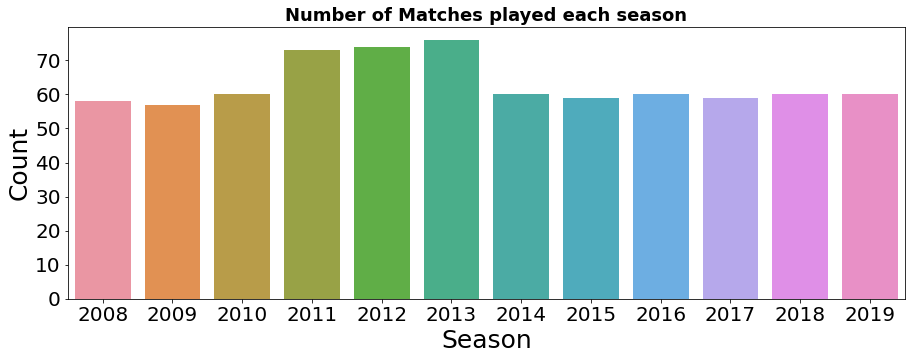

In [19]:
plt.figure(figsize=(15,5))
sns.countplot('season',data=match)
plt.title("Number of Matches played each season", fontsize=18,fontweight='bold')
plt.ylabel("Count", size= 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)

**KEY POINT:- Most number of matches played in 2013.**

**Team Played in each season**

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

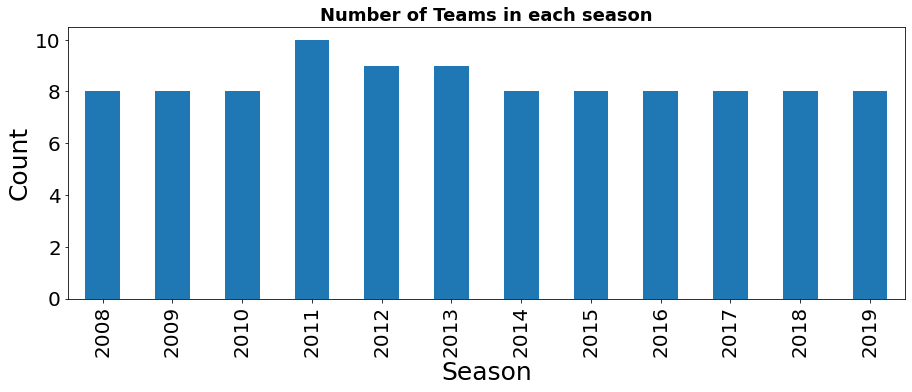

In [20]:
match.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of Teams in each season", fontsize=18,fontweight='bold')
plt.ylabel("Count", size= 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)

**Key Point:- In 2011, 10 teams played IPL. In 2012 and 2013, 9 teams played IPL.**

**Venue that hosted most number of IPL matches**

Text(0.5, 0, 'Frequency')

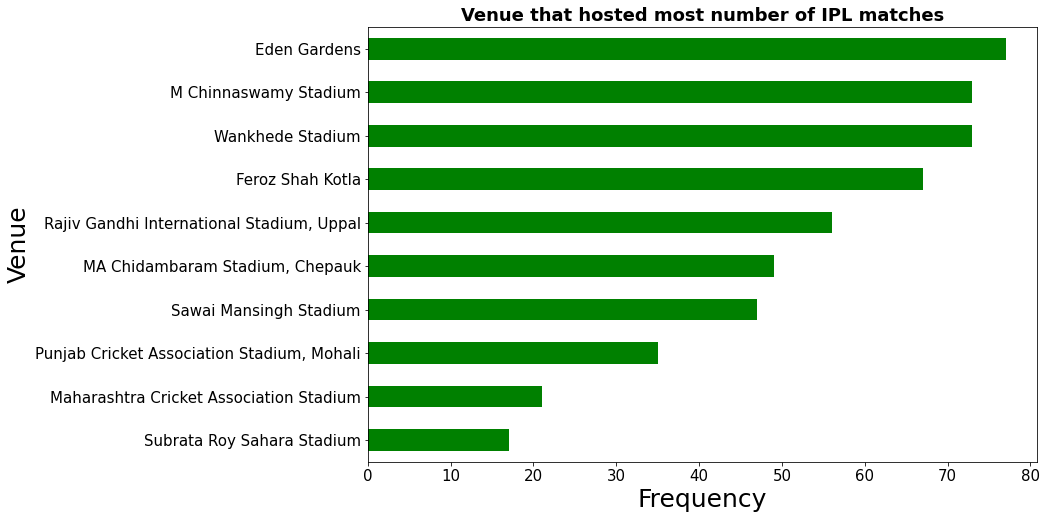

In [22]:
match.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind ='barh', figsize=(12,8), fontsize=15, color='green')
plt.title("Venue that hosted most number of IPL matches", fontsize=18,fontweight='bold')
plt.ylabel("Venue", size= 25)
plt.xlabel("Frequency", size = 25)

**KEY POINT** 

Highest number of matches so far in IPL: **Eden Gardens.**

Lowest Number of matches so far in IPL: **Subrata Roy Sahara Stadium**

**Team with maximum wins in IPL**

In [23]:
#Creating new DataFrame
winning = match[['season','winner']]

In [24]:
#creating dictionaries to get winners of each season
winners = {}
for x in sorted(winning.season.unique()):
  winners[x] = winning[winning.season == x]['winner'].tail(1).values[0]

winners_IPL = pd.Series(winners)
winners_IPL = pd.DataFrame(winners_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

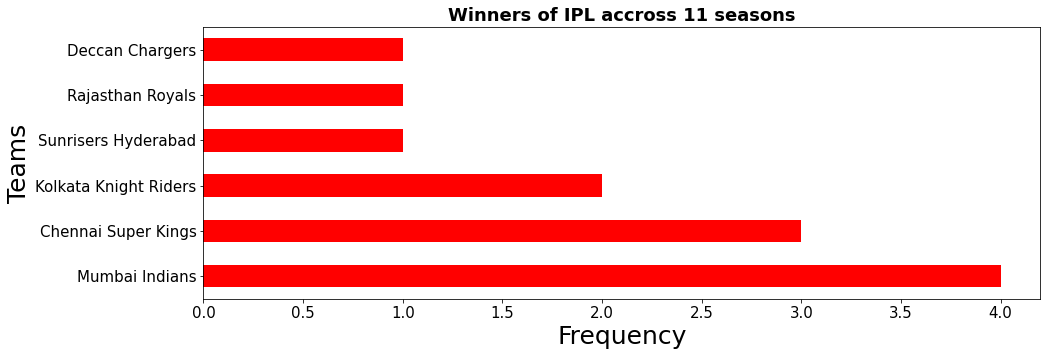

In [25]:
winners_IPL['team'].value_counts().plot(kind = 'barh', figsize =(15,5), color = 'red')
plt.title("Winners of IPL accross 11 seasons", fontsize=18,fontweight='bold')
plt.ylabel("Teams", size= 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

**KEY POINT:- Mumbai Indians wins most of the seasons in IPL till now i.e 4 times.**

**Toss Selection**

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

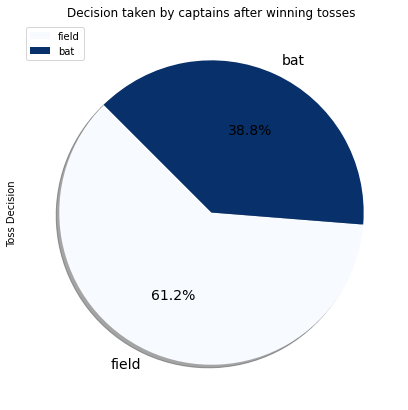

In [29]:
match['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', figsize=(12,7), shadow=True, startangle=135, legend=True, cmap='Blues')
plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

**Near about 60% times who have won tosses have decided to field**

**Toss Decision V/S Match Results?**

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

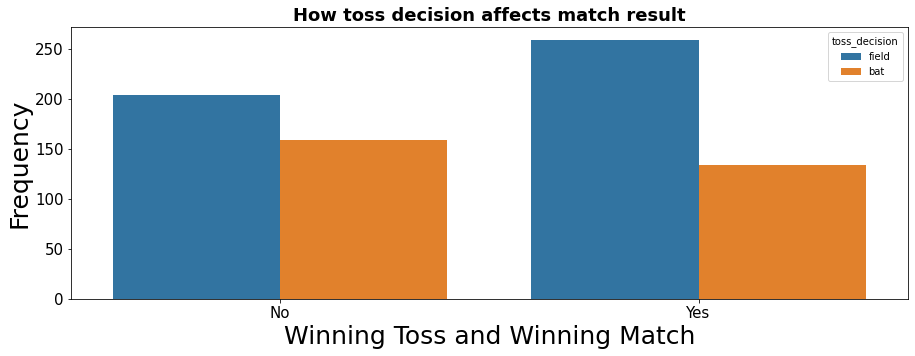

In [31]:
match['toss_win_game_win'] = np.where((match.toss_winner == match.winner), 'Yes','No')
plt.figure(figsize=(15,5))
sns.countplot('toss_win_game_win',data=match, hue = 'toss_decision')
plt.title("How toss decision affects match result", fontsize=18,fontweight='bold')
plt.ylabel("Frequency", size= 25)
plt.xlabel("Winning Toss and Winning Match", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

**Individual Team decision, after winning toss**

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

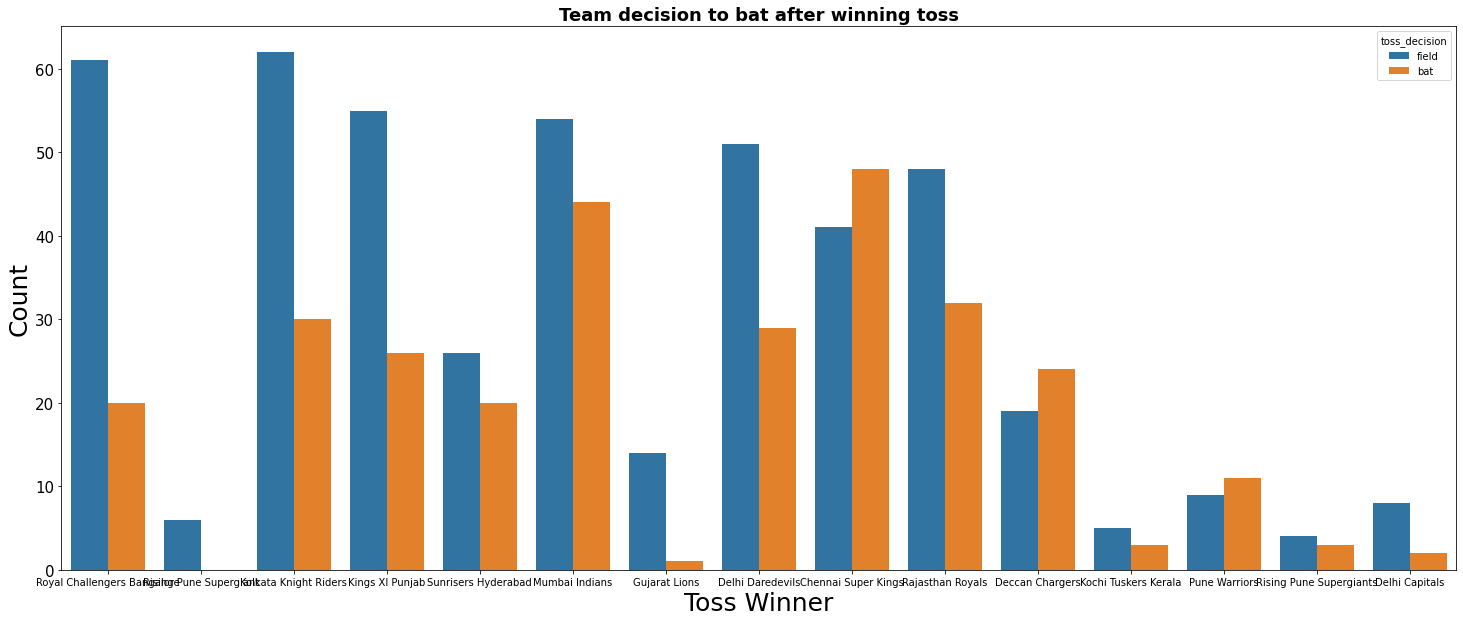

In [32]:
plt.figure(figsize=(25,10))
sns.countplot('toss_winner',data=match, hue = 'toss_decision')
plt.title("Team decision to bat after winning toss", fontsize=18,fontweight='bold')
plt.ylabel("Count", size= 25)
plt.xlabel("Toss Winner", size = 25)
plt.xticks(size = 10)
plt.yticks(size = 15)

**Player's Performance V/S Team's win?**

Text(0.5, 0, 'Players')

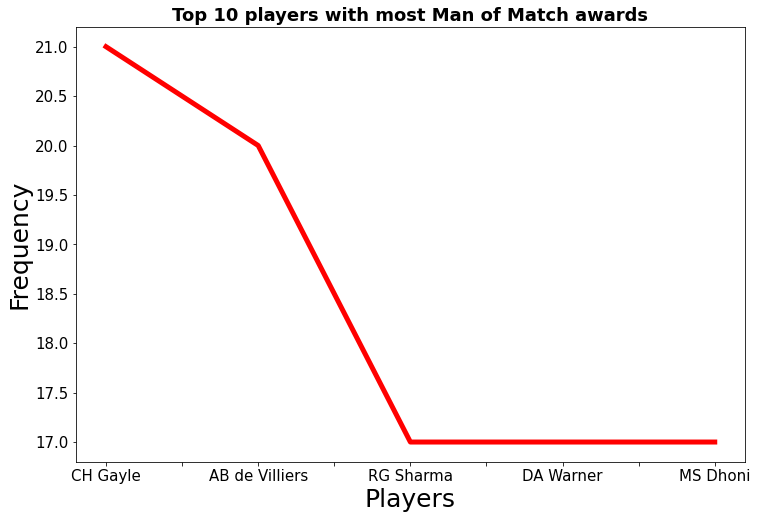

In [34]:
MOM= match['player_of_match'].value_counts()
MOM.head().plot(kind = 'line', figsize=(12,8), fontsize=15, linewidth=5, color='red')
plt.title("Top 10 players with most Man of Match awards", fontsize=18, fontweight='bold')
plt.ylabel("Frequency", size=25)
plt.xlabel("Players", size=25)

**Fielding V/S Winning Matches**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

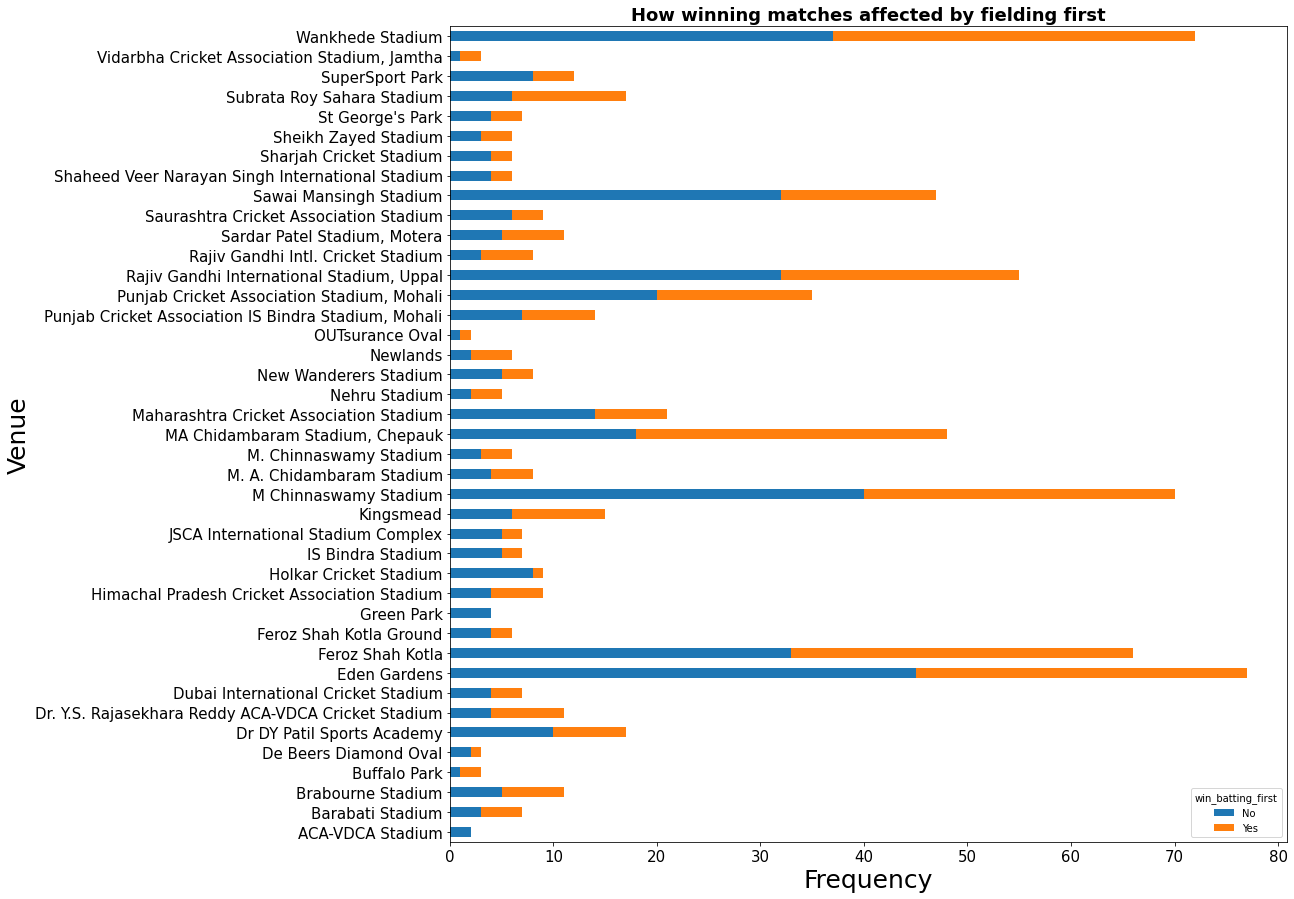

In [39]:
#Creating new DataFrame
normal_match = match[match['result']=='normal']
normal_match['win_batting_first']=np.where((normal_match.win_by_runs>0),'Yes', 'No')
normal_match.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind='barh',stacked=True,figsize=(15,15))
plt.title("How winning matches affected by fielding first", fontsize=18,fontweight='bold')
plt.ylabel("Venue", size= 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

**Is batting second advantageous**

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text major ticklabel objects>)

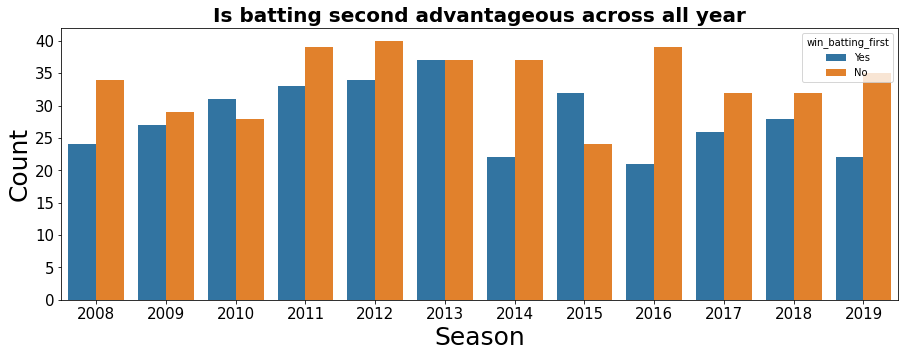

In [38]:
plt.figure(figsize=(15,5))
sns.countplot('season',data=normal_match, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all year", fontsize=20,fontweight='bold')
plt.ylabel("Count", size= 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

**Teams total scoring runs**

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 <a list of 8 Text major ticklabel objects>)

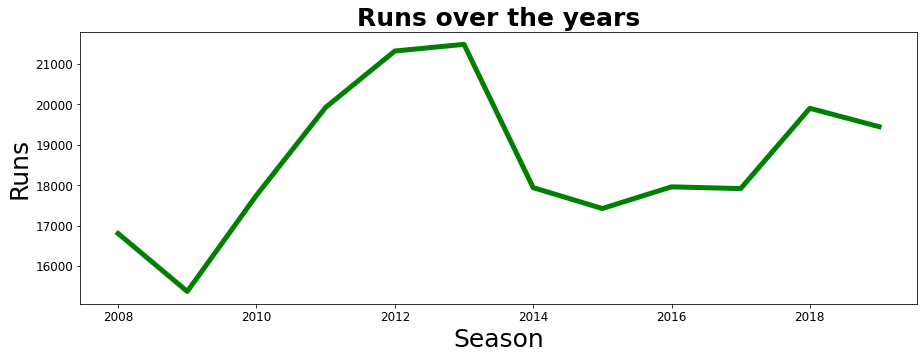

In [42]:
merge.groupby('season')['batsman_runs'].sum().plot(kind='line', linewidth=5, figsize=(15,5), color='green')
plt.title("Runs over the years", fontsize=25,fontweight='bold')
plt.ylabel("Runs", size= 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

**Top Run Getters**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

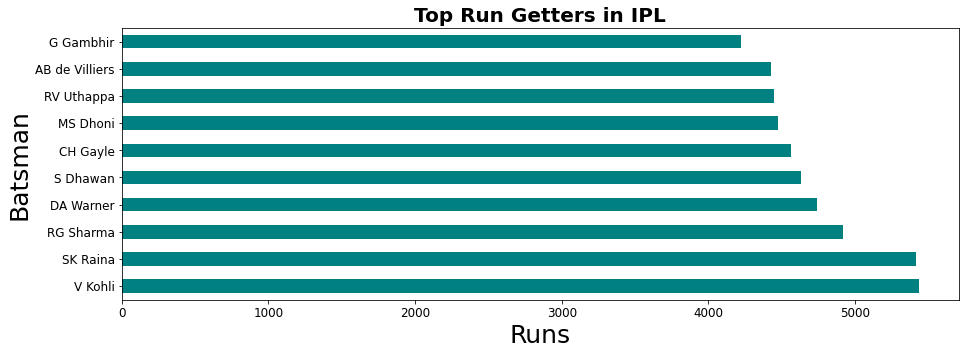

In [45]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(15,5), color='Teal')
plt.title("Top Run Getters in IPL", fontsize=20,fontweight='bold')
plt.ylabel("Batsman", size= 25)
plt.xlabel("Runs", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

**Bowlers who performed the best**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

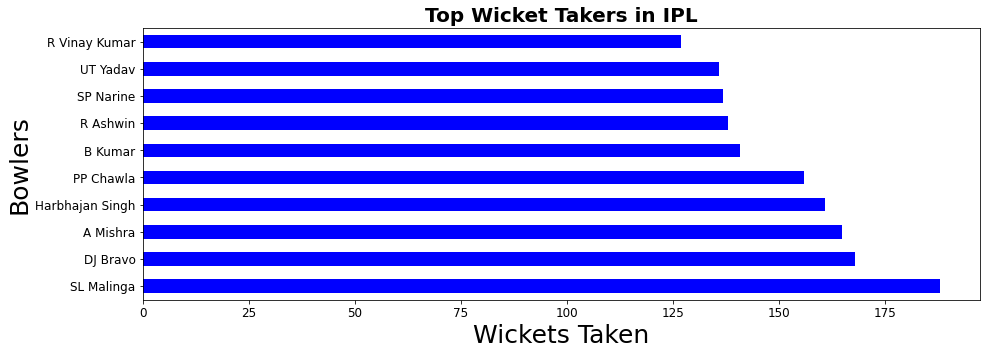

In [46]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(15,5), color='Blue')
plt.title("Top Wicket Takers in IPL", fontsize=20,fontweight='bold')
plt.ylabel("Bowlers", size= 25)
plt.xlabel("Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

**CONCLUSION**

As a sports analysts, on analysing the important factors, I summerized that,

**Mumbai Indian** is most successful team so far accross all season of IPL that means the most winning team of IPL seasons.

Most preferabble ground for IPL is **Eden Gardens** so that maximum number of matches played on this ground.

**Chris Gayle** recieves most Man of the Match reward.

Top run getters are:- **Virat Kohli, Suresh Raina, Rohit Sharma, David Warner, Shikhar Dhawan**

Top Wicket Takers are:- **Lasith Malinga, DJ Bravo, Amit Mishra, Harbhajan Singh, Piyush Chawla**

